# Analyze test data in R

In [3]:
library(here)
library(tidyverse)

here() starts at /home/inf-33-2025/Courses/BINP28_Project


Rows: 38072 Columns:
3
── Column specificati
Delimiter: "\t"
chr (1): chr
dbl (2): pos, qual

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Warning message:
Removed 9519 rows
containing
non-finite outside
the scale range
(`stat_density()`). 


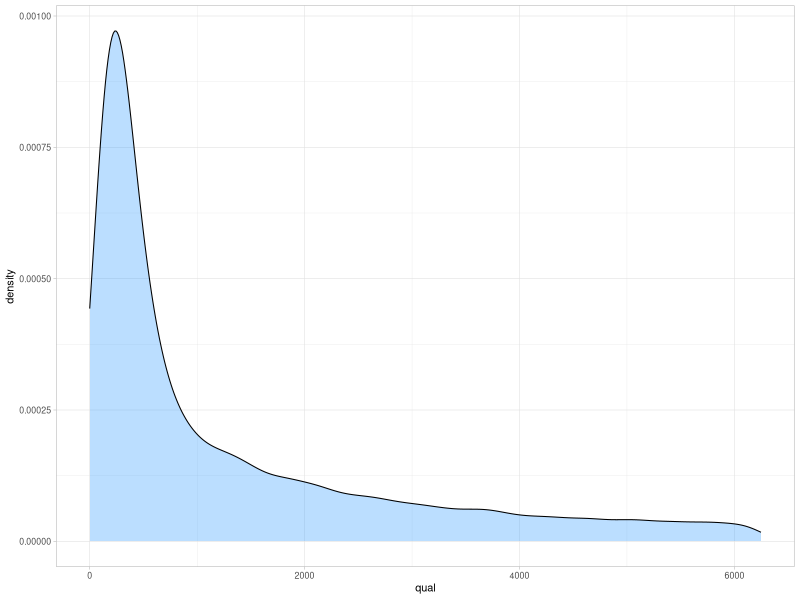

     chr           
 Length:38072      
 Class :character  
 Mode  :character  
                   
                   
                   
      pos          
 Min.   :    2285  
 1st Qu.:16381042  
 Median :32863900  
 Mean   :32641393  
 3rd Qu.:48362390  
 Max.   :68732347  
      qual         
 Min.   :    30.1  
 1st Qu.:   320.0  
 Median :  1315.8  
 Mean   :  5199.4  
 3rd Qu.:  6247.2  
 Max.   :892018.0  

In [28]:
# Quality (Phred scores)
var_qual <- read_delim(
  here("test", "Summary_Stats", "ProjTaxa_Stats.lqual"),
  delim = "\t",
  col_names = c("chr", "pos", "qual"),
  skip = 1
)
ggplot(var_qual, aes(qual)) +
  geom_density(fill = "dodgerblue1", colour = "black", alpha = 0.3) +
  theme_light() +
  xlim(0, 6247.2)
summary(var_qual)

Rows: 38072 Columns:
4
── Column specificati
Delimiter: "\t"
chr (1): chr
dbl (3): pos, mea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Warning message:
Removed 119 rows
containing
non-finite outside
the scale range
(`stat_density()`). 


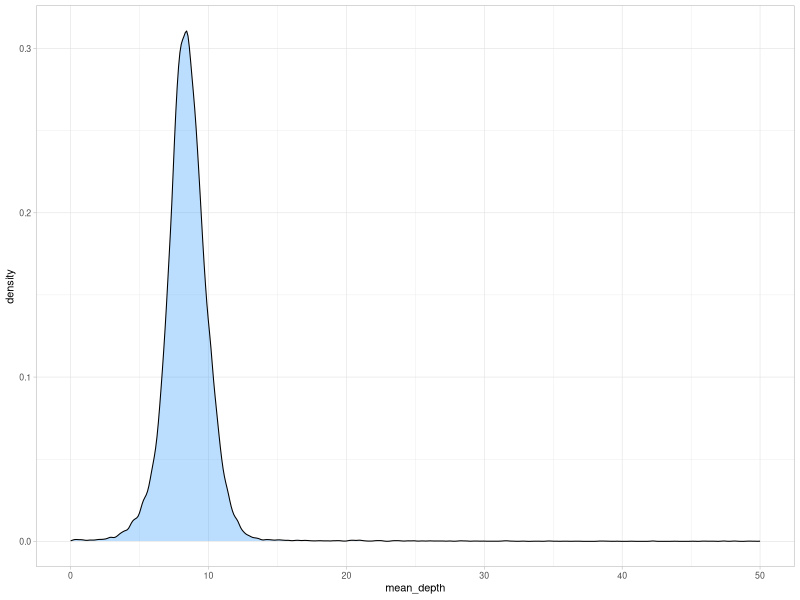

     chr           
 Length:38072      
 Class :character  
 Mode  :character  
                   
                   
                   
      pos          
 Min.   :    2285  
 1st Qu.:16381042  
 Median :32863900  
 Mean   :32641393  
 3rd Qu.:48362390  
 Max.   :68732347  
   mean_depth      
 Min.   :  0.0625  
 1st Qu.:  7.5625  
 Median :  8.4375  
 Mean   :  9.0077  
 3rd Qu.:  9.3125  
 Max.   :459.3750  
   var_depth        
 Min.   :    0.062  
 1st Qu.:    6.662  
 Median :    9.717  
 Mean   :   22.561  
 3rd Qu.:   13.850  
 Max.   :21326.000  

In [23]:
# Variant mean depth
var_depth <- read_delim(
  here("test", "Summary_Stats", "ProjTaxa_Stats.ldepth.mean"),
  delim = "\t",
  col_names = c("chr", "pos", "mean_depth", "var_depth"),
  skip = 1
)
ggplot(var_depth, aes(mean_depth)) +
  geom_density(fill = "dodgerblue1", colour = "black", alpha = 0.3) + 
  theme_light() +
  xlim(0, 50)
summary(var_depth)

Rows: 38072 Columns:
6
── Column specificati
Delimiter: "\t"
chr (1): chr
dbl (5): pos, nch...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


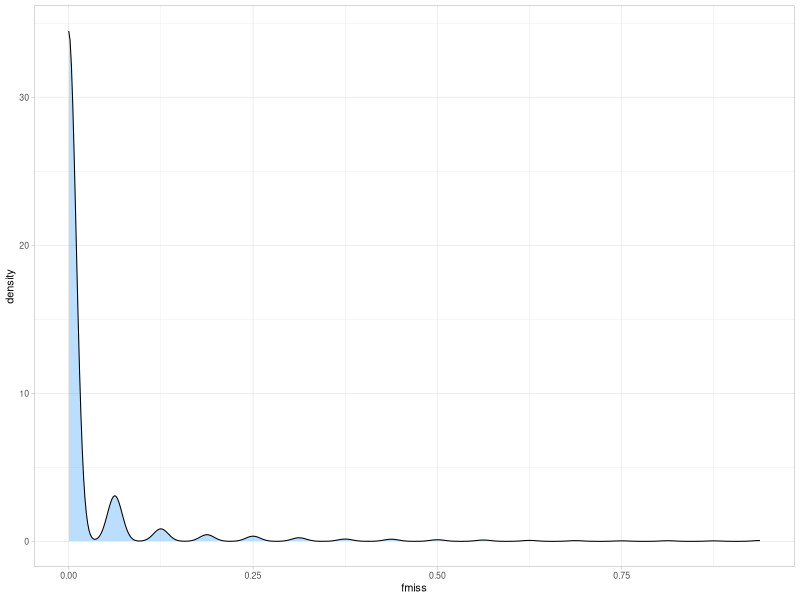

     chr           
 Length:38072      
 Class :character  
 Mode  :character  
                   
                   
                   
      pos          
 Min.   :    2285  
 1st Qu.:16381042  
 Median :32863900  
 Mean   :32641393  
 3rd Qu.:48362390  
 Max.   :68732347  
      nchr   
 Min.   :32  
 1st Qu.:32  
 Median :32  
 Mean   :32  
 3rd Qu.:32  
 Max.   :32  
   nfiltered
 Min.   :0  
 1st Qu.:0  
 Median :0  
 Mean   :0  
 3rd Qu.:0  
 Max.   :0  
     nmiss        
 Min.   : 0.0000  
 1st Qu.: 0.0000  
 Median : 0.0000  
 Mean   : 0.7763  
 3rd Qu.: 0.0000  
 Max.   :30.0000  
     fmiss        
 Min.   :0.00000  
 1st Qu.:0.00000  
 Median :0.00000  
 Mean   :0.02426  
 3rd Qu.:0.00000  
 Max.   :0.93750  

In [24]:
# Variant missingness
var_miss <- read_delim(
  here("test", "Summary_Stats", "ProjTaxa_Stats.lmiss"),
  delim = "\t",
  col_names = c("chr", "pos", "nchr", "nfiltered", "nmiss", "fmiss"),
  skip = 1
)
ggplot(var_miss, aes(fmiss)) +
  geom_density(fill = "dodgerblue1", colour = "black", alpha = 0.3) +
  theme_light()
summary(var_miss)

Rows: 36297 Columns:
6
── Column specificati
Delimiter: "\t"
chr (1): chr
dbl (5): pos, nal...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


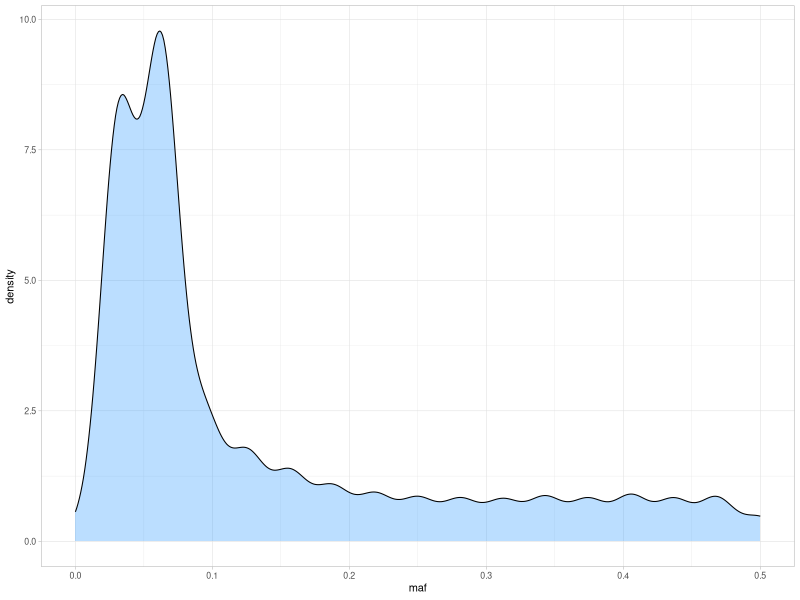

In [14]:
# Minor allele frequency
var_freq <- read_delim(
  here("test", "Summary_Stats", "ProjTaxa_Stats.frq"),
  delim = "\t",
  col_names = c("chr", "pos", "nalleles", "nchr", "a1", "a2"),
  skip = 1
)
var_freq$maf <- var_freq %>% select(a1, a2) %>% apply(1, function(z) min(z))
ggplot(var_freq, aes(maf)) +
  geom_density(fill = "dodgerblue1", colour = "black", alpha = 0.3) +
  theme_light()


Rows: 16 Columns: 3
── Column specificati
Delimiter: "\t"
chr (1): ind
dbl (2): nsites, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


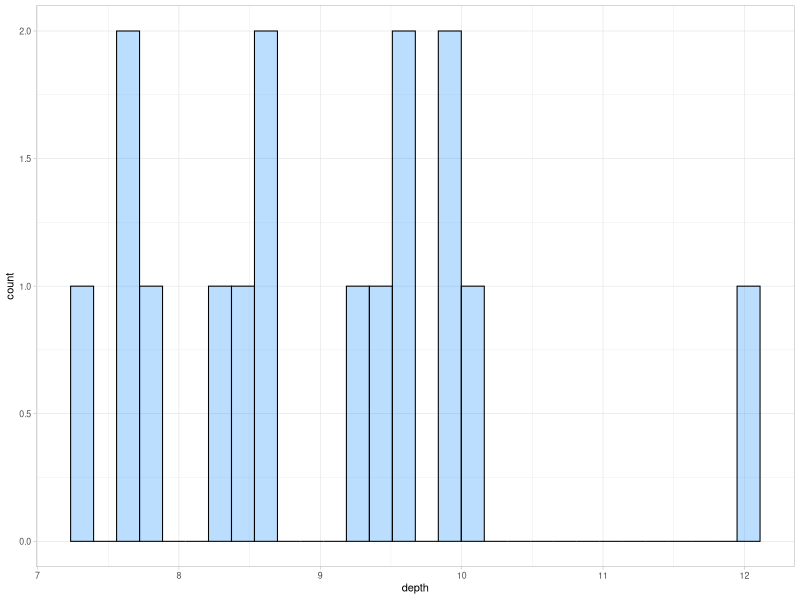

`stat_bin()` using
`bins = 30`. Pick
better value with
`binwidth`.

In [15]:
# Mean depth per individual
ind_depth <- read_delim(
  here("test", "Summary_Stats", "ProjTaxa_Stats.idepth"),
  delim = "\t",
  col_names = c("ind", "nsites", "depth"),
  skip = 1
)
ggplot(ind_depth, aes(depth)) +
  geom_histogram(fill = "dodgerblue1", colour = "black", alpha = 0.3) +
  theme_light()

Rows: 16 Columns: 5
── Column specificati
Delimiter: "\t"
chr (1): ind
dbl (4): ndata, n...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


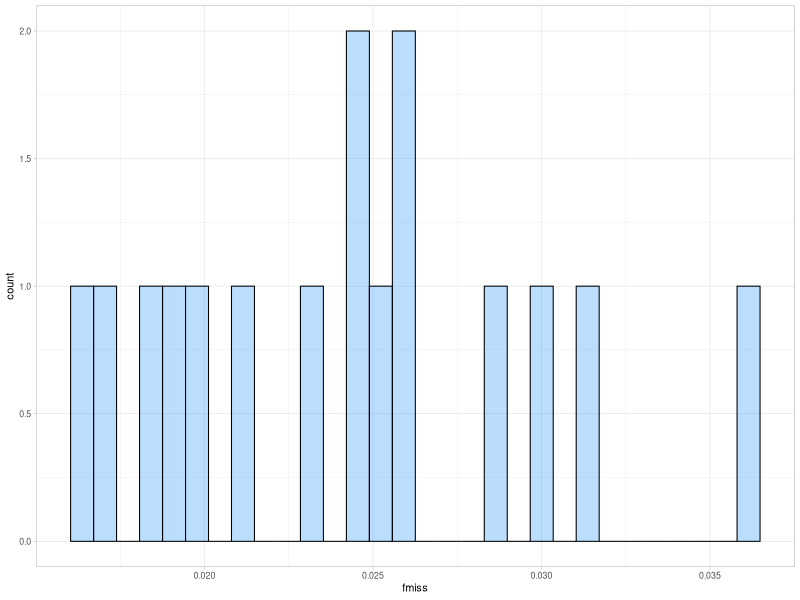

`stat_bin()` using
`bins = 30`. Pick
better value with
`binwidth`.

In [17]:
# Proportion of missing data per individual
ind_miss  <- read_delim(
  here("test", "Summary_Stats", "ProjTaxa_Stats.imiss"),
  delim = "\t",
  col_names = c("ind", "ndata", "nfiltered", "nmiss", "fmiss"),
  skip = 1
)
ggplot(ind_miss, aes(fmiss)) +
  geom_histogram(fill = "dodgerblue1", colour = "black", alpha = 0.3) + 
  theme_light()

Rows: 16 Columns: 5
── Column specificati
Delimiter: "\t"
chr (1): ind
dbl (4): ho, he, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


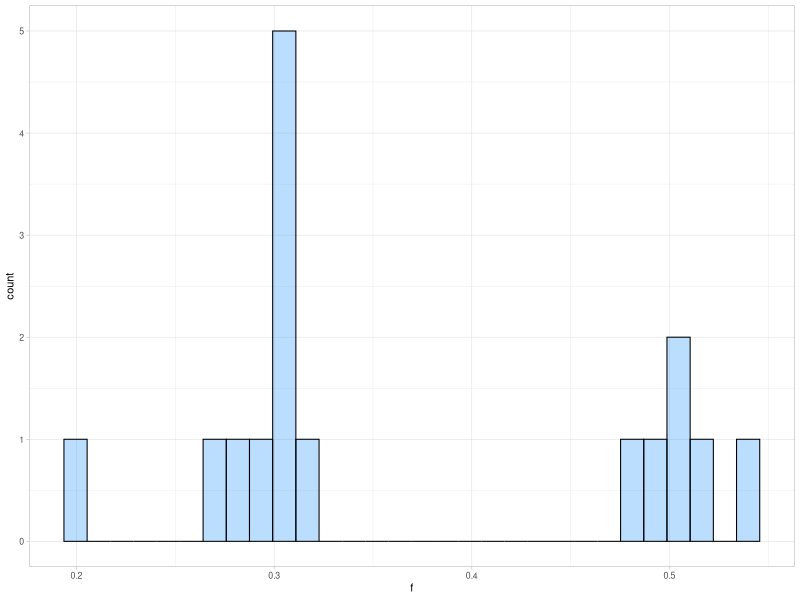

`stat_bin()` using
`bins = 30`. Pick
better value with
`binwidth`.

In [18]:
# Heterozygosity and inbreeding coefficient per individual
ind_het <- read_delim(
  here("test", "Summary_Stats", "ProjTaxa_Stats.het"),
  delim = "\t",
  col_names = c("ind","ho", "he", "nsites", "f"),
  skip = 1
)
ggplot(ind_het, aes(f)) +
  geom_histogram(fill = "dodgerblue1", colour = "black", alpha = 0.3) +
  theme_light()